In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.proportion import power_proportions_2indep
 

In [2]:
res = power_proportions_2indep(0.02, 0.1, 100, alpha=0.05)
print(res.power) 

0.073588299245432


In [3]:
alphas = [0.05, 0.10, 0.15]
control_percentages = np.arange(0.02, 0.98, 0.02)
counts = np.arange(25, 1000, 25)
diffs = [0.02, 0.05, 0.10, 0.15]
results = {
    'alpha': [],
    'control_percentage': [],
    'count': [],
    'diff': [],
    'power': []
}
for _alpha in alphas:
    for _control_percentage in control_percentages:
        for _count in counts:
            for _diff in diffs:
                if _control_percentage + _diff > 1.0:
                    continue
                res = power_proportions_2indep(
                    diff=_diff,
                    prop2=_control_percentage,
                    nobs1=_count,
                    alpha=_alpha
                )
                results['alpha'].append(_alpha)
                results['count'].append(_count)
                results['diff'].append(_diff)
                results['control_percentage'].append(_control_percentage)
                results['power'].append(res.power)
res_df = pd.DataFrame(results) 

In [4]:
print(res_df.head(10), res_df.shape)

   alpha  control_percentage  count  diff     power
0   0.05                0.02     25  0.02  0.069488
1   0.05                0.02     25  0.05  0.134650
2   0.05                0.02     25  0.10  0.279383
3   0.05                0.02     25  0.15  0.437869
4   0.05                0.02     50  0.02  0.089770
5   0.05                0.02     50  0.05  0.224475
6   0.05                0.02     50  0.10  0.499906
7   0.05                0.02     50  0.15  0.731866
8   0.05                0.02     75  0.02  0.110376
9   0.05                0.02     75  0.05  0.313566 (21294, 5)


0.05


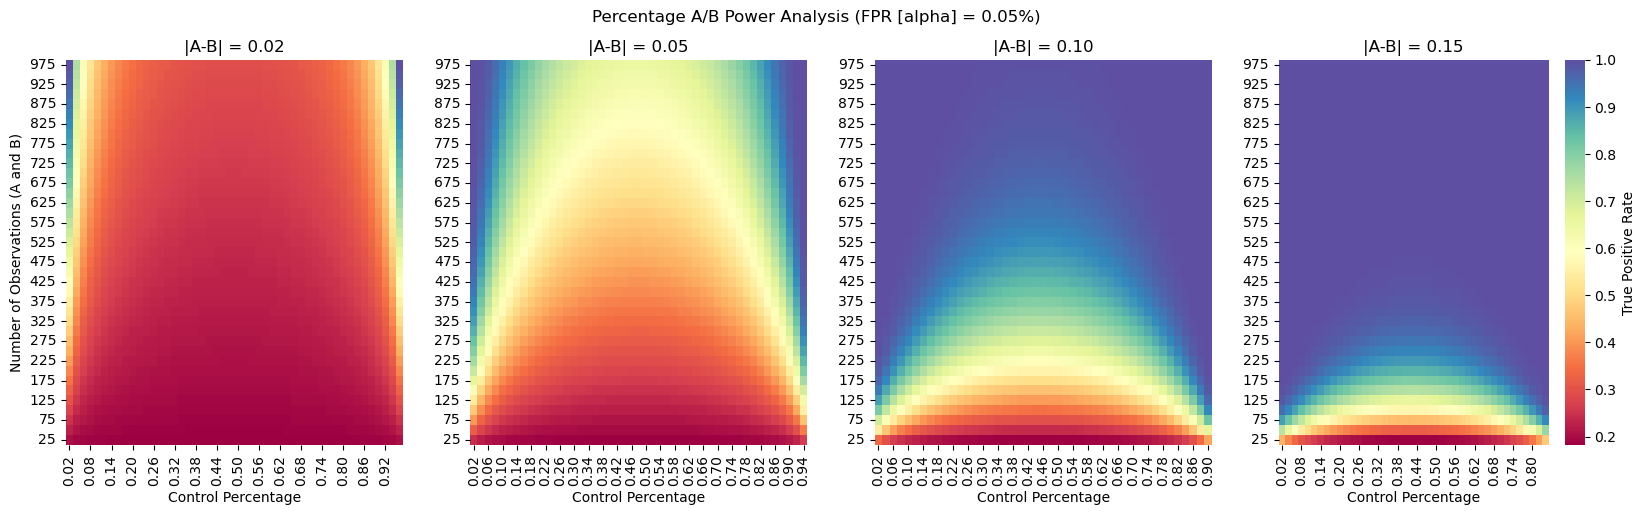

0.1


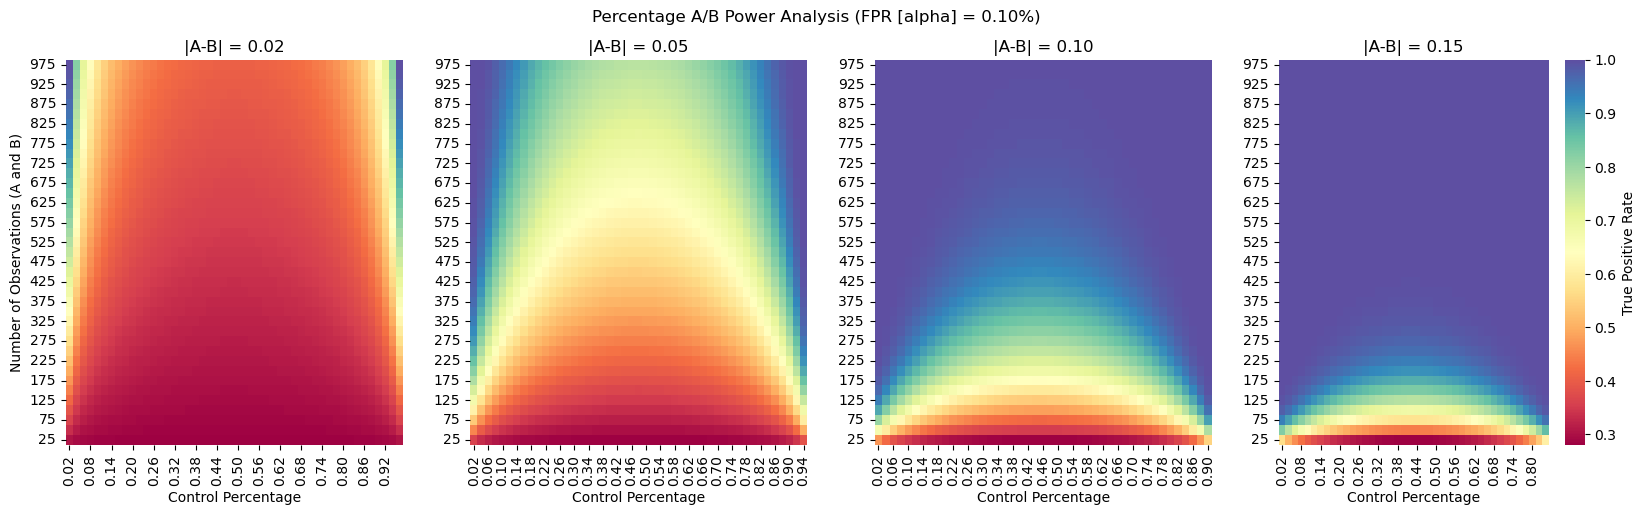

0.15


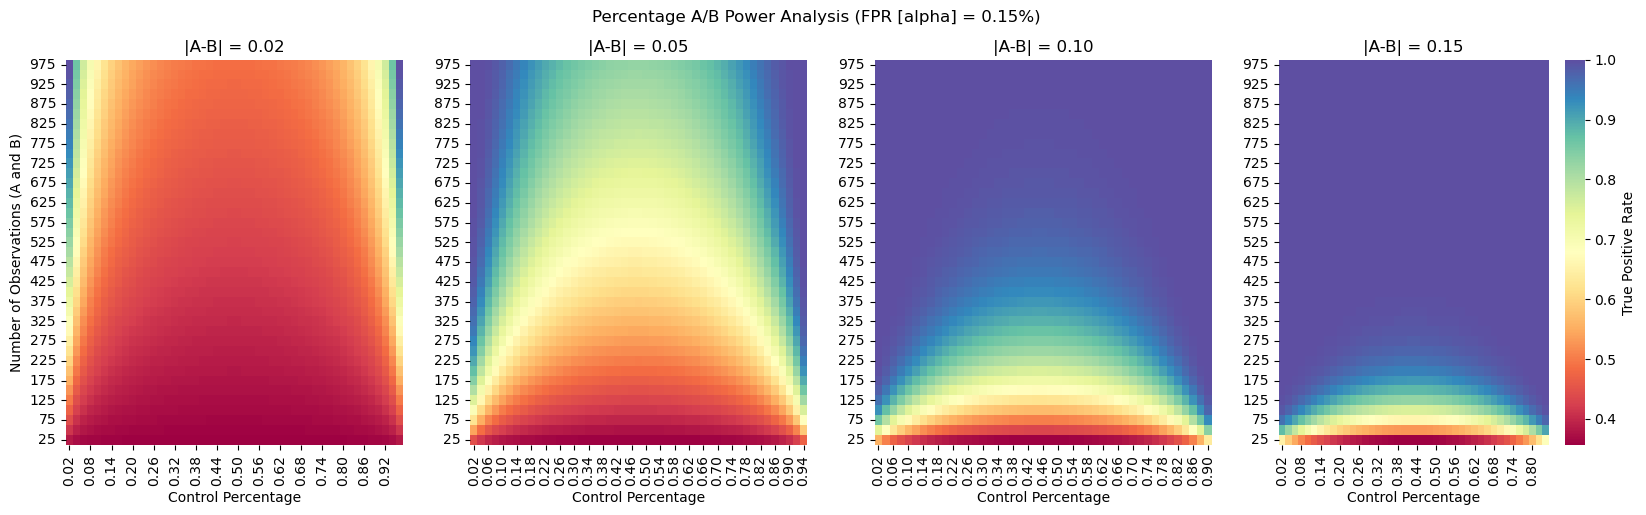

In [8]:

for _alpha in alphas:
    fig = plt.figure(figsize=(20,5))
    axes = fig.subplots(1, 4)
    print(_alpha)
    
    for i, _diff in enumerate(diffs):
        alpha_df = res_df.loc[(res_df['alpha'] == _alpha) & (res_df['diff'] == _diff)]
        heatmap_df = alpha_df[['control_percentage', 'count', 'power']]\
            .pivot(index='count', columns='control_percentage', values='power')

        g = sns.heatmap(
            heatmap_df,
            cmap=sns.color_palette('Spectral', as_cmap=True),
            cbar= i == 3,
            cbar_kws={'label':'True Positive Rate'} if i == 3 else None,
            ax=axes[i]
        )
        g.invert_yaxis()
        
        # round x-axis labels
        xtick_labels = g.get_xticklabels()
        for xtick in xtick_labels:
            xtick.set_text(f'{float(xtick.get_text()):.2f}')
        g.set_xticklabels(xtick_labels)
        if i == 0:
            axes[0].set_ylabel('Number of Observations (A and B)')
        else:
            axes[i].set_ylabel(None)
        axes[i].set_xlabel('Control Percentage')
        axes[i].set_title(f'|A-B| = {_diff:.2f}')
    fig.suptitle(f'Percentage A/B Power Analysis (FPR [alpha] = {_alpha:.2f}%)')
    plt.show()